In [4]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator 
# Use tensorflow.keras.preprocessing.image for ImageDataGenerator

In [5]:
# Suba o arquivo kaggle.json, que contém suas credenciais
from google.colab import files
files.upload()

# Criar pasta .kaggle e mover kaggle.json para ela
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/

# Definir permissões para o arquivo kaggle.json
!chmod 600 ~/.kaggle/kaggle.json

Saving kaggle.json to kaggle.json


In [6]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [7]:
!kaggle datasets download -d paultimothymooney/chest-xray-pneumonia

Dataset URL: https://www.kaggle.com/datasets/paultimothymooney/chest-xray-pneumonia
License(s): other
chest-xray-pneumonia.zip: Skipping, found more recently modified local copy (use --force to force download)


In [8]:
!unzip chest-xray-pneumonia.zip

A saída de streaming foi truncada nas últimas 5000 linhas.
  inflating: chest_xray/train/NORMAL/IM-0435-0001-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0435-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0437-0001-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0437-0001-0002.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0437-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0438-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0439-0001-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0439-0001-0002.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0439-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0440-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0441-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0442-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0444-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0445-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0446-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0447-0001.jpeg  
  in

In [9]:
!pip install lime opencv-python matplotlib scikit-learn seaborn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 4.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283834 sha256=fd02b9646e602b1917cbd8c1b2f4418b1289cfe573461212d517f60105a2cb64
  Stored in directory: /root/.cache/pip/wheels/fd/a2/af/9ac0a1a85a27f314a06b39e1f492bee1547d52549a4606ed89
Successfully built lime


O Random Forest é um algoritmo de aprendizado de máquina baseado em ensemble learning, o que significa que combina múltiplos modelos fracos para formar um modelo forte e robusto. Ele é amplamente utilizado tanto para tarefas de classificação quanto de regressão.

Como funciona:

Criação de múltiplas árvores de decisão: O Random Forest constrói várias árvores de decisão a partir de diferentes subconjuntos de dados e características, selecionados aleatoriamente com substituição (um processo chamado bagging).

Treinamento independente: Cada árvore é treinada de maneira independente, criando um modelo que pode ser diferente devido à amostragem aleatória dos dados e características.

Combinação dos resultados:

Para classificação, o Random Forest combina os resultados das árvores por meio de uma votação majoritária — ou seja, a classe que mais aparece nas previsões das árvores é a escolhida.

In [10]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Função para carregar as imagens e converter para escala de cinza
def load_images(dataset_dir, img_size=(128, 128)):
    images = []
    labels = []
    classes = ['NORMAL', 'PNEUMONIA']  # As pastas do dataset
    for class_name in classes:
        class_dir = os.path.join(dataset_dir, 'train', class_name)
        label = classes.index(class_name)
        for img_name in os.listdir(class_dir):
            img_path = os.path.join(class_dir, img_name)
            img = cv2.imread(img_path)
            if img is not None:
                img = cv2.resize(img, img_size)  # Redimensionar
                img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)  # Converter para escala de cinza
                images.append(img.flatten())  # Achatar a imagem para vetor
                labels.append(label)
    return np.array(images), np.array(labels)

# Carregar as imagens do dataset
dataset_dir = './chest_xray'  # Substitua pelo caminho correto
X, y = load_images(dataset_dir)



In [11]:
# Função para carregar as imagens e contar as amostras em cada classe
#def count_samples_per_class(dataset_dir):
#    classes = ['NORMAL', 'PNEUMONIA']  # As pastas do dataset
#    class_counts = {}

#    for class_name in classes:
#        class_dir = os.path.join(dataset_dir, class_name)
#        if os.path.exists(class_dir):
#            num_samples = len(os.listdir(class_dir))
#            class_counts[class_name] = num_samples
#        else:
#            class_counts[class_name] = 0
#
#    return class_counts

# Diretório do dataset
#dataset_dir = './chest_xray/train'  # Substitua pelo caminho correto

# Contar amostras em cada classe
#class_counts = count_samples_per_class(dataset_dir)

# Exibir o resultado
#for class_name, count in class_counts.items():
#    print(f"Classe {class_name}: {count} amostras")

# Visualização
#sns.barplot(x=list(class_counts.keys()), y=list(class_counts.values()))
#plt.title('Quantidade de amostras por classe')
#plt.xlabel('Classe')
#plt.ylabel('Quantidade de Amostras')
#plt.show()

In [12]:
# Dividir os dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

Random Forest funciona treinando várias árvores de decisão, e em problemas com muitas variáveis, isso pode ser computacionalmente caro. Reduzir o número de variáveis por meio de PCA pode ajudar a diminuir o tempo de execução e a memória necessária, mantendo as informações mais relevantes.
PCA reduz os dados para um conjunto menor de componentes principais que explicam a maior parte da variabilidade dos dados, enquanto descarta variáveis menos relevantes.

In [13]:
# Aplicar PCA para reduzir a dimensionalidade
pca = PCA(n_components=100)  # Reduzir para 100 componentes principais
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

In [14]:
#from imblearn.over_sampling import SMOTE

# Aplicar SMOTE para gerar novas amostras sintéticas da classe minoritária
#smote = SMOTE(random_state=42)
#X_train_resampled, y_train_resampled = smote.fit_resample(X_train_pca, y_train)

# Verificar a nova distribuição das classes
#print(f"Distribuição de classes após SMOTE: {np.bincount(y_train_resampled)}")


In [15]:
# Treinar o modelo Random Forest
#rf_model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=42)
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
#rf_model.fit(X_train_resampled, y_train_resampled)
rf_model.fit(X_train_pca, y_train)



RandomForestClassifier(random_state=42)

In [16]:
# Fazer predições no conjunto de teste
y_pred_rf = rf_model.predict(X_test_pca)



Acurácia: 93.49%
Precisão: 0.93
Recall: 0.99
AUC: 0.88


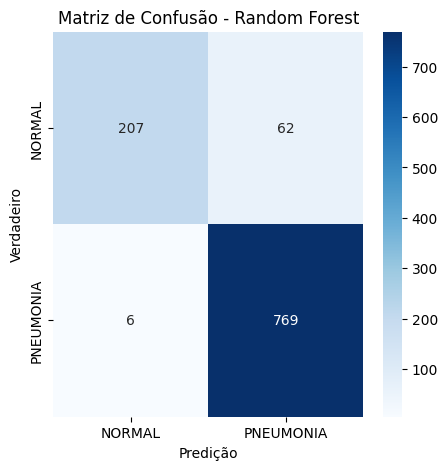

In [17]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Calcular as métricas para o teste
rf_accuracy = accuracy_score(y_test, y_pred_rf)
rf_precision = precision_score(y_test, y_pred_rf)
rf_recall = recall_score(y_test, y_pred_rf)
rf_auc = roc_auc_score(y_test, y_pred_rf)

# Exibir as métricas
print(f'Acurácia: {rf_accuracy * 100:.2f}%')
print(f'Precisão: {rf_precision:.2f}')
print(f'Recall: {rf_recall:.2f}')
print(f'AUC: {rf_auc:.2f}')

# Exibir a matriz de confusão
cm = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(5, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['NORMAL', 'PNEUMONIA'], yticklabels=['NORMAL', 'PNEUMONIA'])
plt.xlabel('Predição')
plt.ylabel('Verdadeiro')
plt.title('Matriz de Confusão - Random Forest')
plt.show()

In [18]:
from sklearn.metrics import accuracy_score

# Acurácia no conjunto de treino
train_predictions = rf_model.predict(X_train_pca)
train_accuracy = accuracy_score(y_train, train_predictions)
print(f'Acurácia no conjunto de treino: {train_accuracy:.2f}')

# Acurácia no conjunto de teste
test_predictions = rf_model.predict(X_test_pca)
test_accuracy = accuracy_score(y_test, test_predictions)
print(f'Acurácia no conjunto de teste: {test_accuracy:.2f}')

Acurácia no conjunto de treino: 1.00
Acurácia no conjunto de teste: 0.93


  0%|          | 0/1000 [00:00<?, ?it/s]

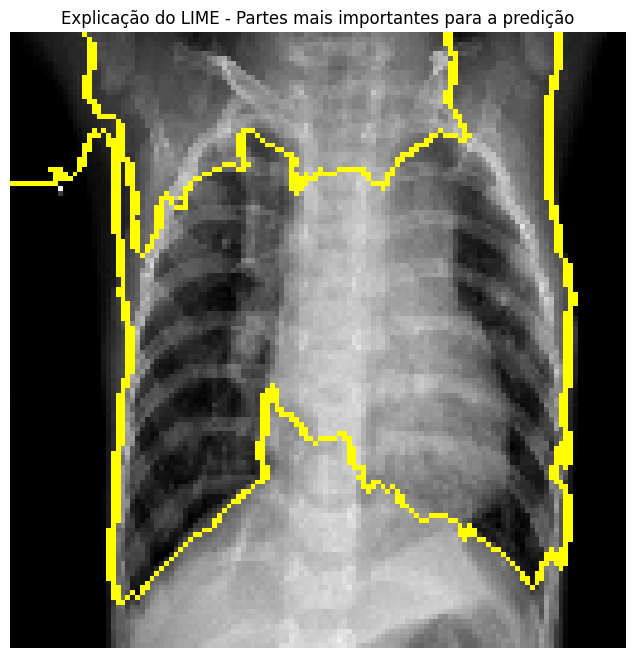

In [22]:
import lime
import lime.lime_image
from skimage.segmentation import mark_boundaries

# Carregar uma imagem para explicação
image_path = './chest_xray/test/PNEUMONIA/person103_bacteria_490.jpeg'  # Substitua com o caminho de uma imagem de teste
img = cv2.imread(image_path)
img_resized = cv2.resize(img, (128, 128))  # Redimensionar para o tamanho usado no treinamento

# Normalizar a imagem e converter para o formato de entrada do LIME
img_normalized = img_resized / 255.0

# Função preditora que aplica o PCA antes de usar o modelo Random Forest
def predict_fn(images):
    # Converter as imagens para escala de cinza e achatar
    images_gray = [cv2.cvtColor(cv2.resize(img, (128, 128)), cv2.COLOR_BGR2GRAY).flatten() for img in images]

    # Aplicar o PCA para reduzir as características para 100 componentes
    images_pca = pca.transform(images_gray)

    # Fazer predições usando o modelo de Random Forest
    return rf_model.predict_proba(images_pca)

# Criar um explicador LIME para imagens
explainer = lime.lime_image.LimeImageExplainer()

# Explicar a predição de uma imagem
explanation = explainer.explain_instance(
    img_resized,  # A imagem original
    predict_fn,   # Função preditora que aplica o PCA
    top_labels=2, # Número de classes
    hide_color=0, # Cor para esconder superpixels (0 significa preto)
    num_samples=1000  # Número de amostras de perturbação para gerar explicações
)

# Visualizar a explicação
temp, mask = explanation.get_image_and_mask(
    label=rf_model.predict(pca.transform([cv2.cvtColor(img_resized, cv2.COLOR_BGR2GRAY).flatten()]))[0],  # Predição do modelo
    positive_only=True,  # Mostrar apenas as regiões que aumentam a probabilidade da classe predita
    num_features=5,     # Número de superpixels a serem mostrados
    hide_rest=True      # Mostrar o restante da imagem ou ocultar
)

# Plotar a imagem original com a explicação sobreposta
plt.figure(figsize=(8, 8))
plt.imshow(mark_boundaries(img_resized, mask))
plt.title("Explicação do LIME - Partes mais importantes para a predição")
plt.axis('off')
plt.show()

  0%|          | 0/1000 [00:00<?, ?it/s]

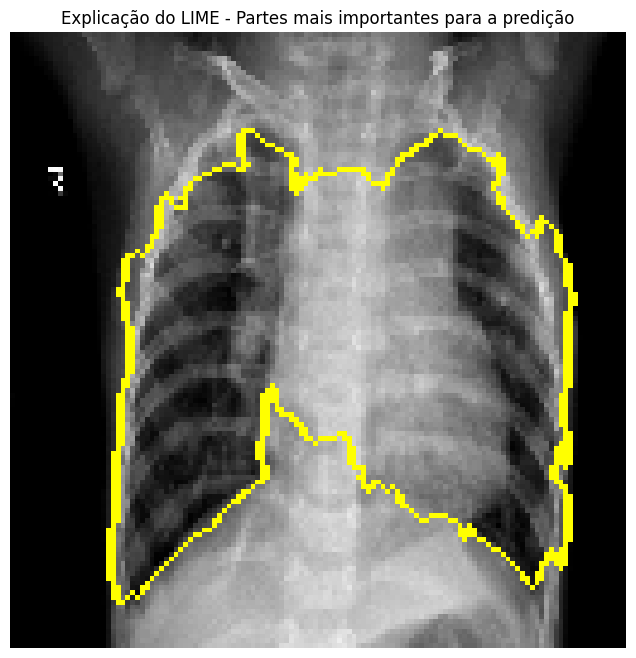

In [23]:
# Carregar uma imagem para explicação
image_path = './chest_xray/test/PNEUMONIA/person103_bacteria_490.jpeg'  # Substitua com o caminho de uma imagem de teste
img = cv2.imread(image_path)
img_resized = cv2.resize(img, (128, 128))  # Redimensionar para o tamanho usado no treinamento

# Normalizar a imagem e converter para o formato de entrada do LIME
img_normalized = img_resized / 255.0

# Função preditora que aplica o PCA antes de usar o modelo Random Forest
def predict_fn(images):
    # Converter as imagens para escala de cinza e achatar
    images_gray = [cv2.cvtColor(cv2.resize(img, (128, 128)), cv2.COLOR_BGR2GRAY).flatten() for img in images]

    # Aplicar o PCA para reduzir as características para 100 componentes
    images_pca = pca.transform(images_gray)

    # Fazer predições usando o modelo de Random Forest
    return rf_model.predict_proba(images_pca)

# Criar um explicador LIME para imagens
explainer = lime.lime_image.LimeImageExplainer()

# Explicar a predição de uma imagem
explanation = explainer.explain_instance(
    img_resized,  # A imagem original
    predict_fn,   # Função preditora que aplica o PCA
    top_labels=2, # Número de classes
    hide_color=0, # Cor para esconder superpixels (0 significa preto)
    num_samples=1000  # Número de amostras de perturbação para gerar explicações
)

# Visualizar a explicação
temp, mask = explanation.get_image_and_mask(
    label=rf_model.predict(pca.transform([cv2.cvtColor(img_resized, cv2.COLOR_BGR2GRAY).flatten()]))[0],  # Predição do modelo
    positive_only=True,  # Mostrar apenas as regiões que aumentam a probabilidade da classe predita
    num_features=3,     # Número de superpixels a serem mostrados
    hide_rest=False      # Mostrar o restante da imagem ou ocultar
)

# Plotar a imagem original com a explicação sobreposta
plt.figure(figsize=(8, 8))
plt.imshow(mark_boundaries(img_resized, mask))
plt.title("Explicação do LIME - Partes mais importantes para a predição")
plt.axis('off')
plt.show()

  0%|          | 0/1000 [00:00<?, ?it/s]

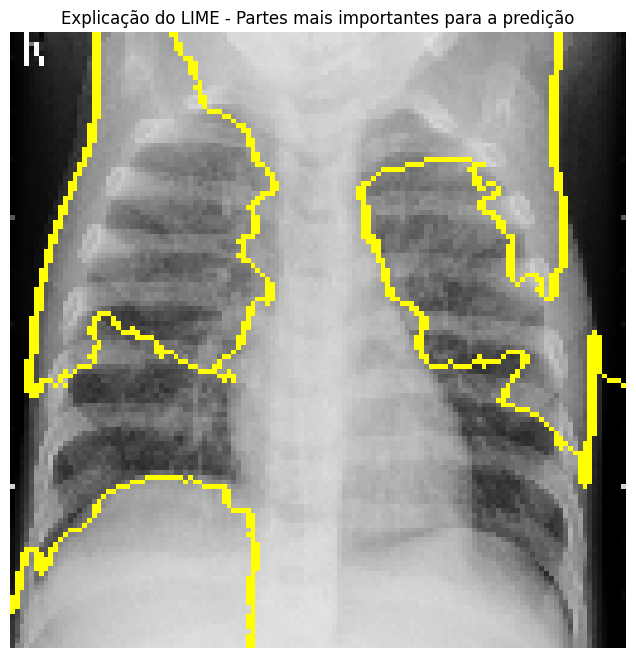

In [21]:
# Carregar uma imagem para explicação
image_path = './chest_xray/test/PNEUMONIA/person22_virus_55.jpeg'  # Substitua com o caminho de uma imagem de teste
img = cv2.imread(image_path)
img_resized = cv2.resize(img, (128, 128))  # Redimensionar para o tamanho usado no treinamento

# Normalizar a imagem e converter para o formato de entrada do LIME
img_normalized = img_resized / 255.0

# Função preditora que aplica o PCA antes de usar o modelo Random Forest
def predict_fn(images):
    # Converter as imagens para escala de cinza e achatar
    images_gray = [cv2.cvtColor(cv2.resize(img, (128, 128)), cv2.COLOR_BGR2GRAY).flatten() for img in images]

    # Aplicar o PCA para reduzir as características para 100 componentes
    images_pca = pca.transform(images_gray)

    # Fazer predições usando o modelo de Random Forest
    return rf_model.predict_proba(images_pca)

# Criar um explicador LIME para imagens
explainer = lime.lime_image.LimeImageExplainer()

# Explicar a predição de uma imagem
explanation = explainer.explain_instance(
    img_resized,  # A imagem original
    predict_fn,   # Função preditora que aplica o PCA
    top_labels=2, # Número de classes
    hide_color=0, # Cor para esconder superpixels (0 significa preto)
    num_samples=1000  # Número de amostras de perturbação para gerar explicações
)

# Visualizar a explicação
temp, mask = explanation.get_image_and_mask(
    label=rf_model.predict(pca.transform([cv2.cvtColor(img_resized, cv2.COLOR_BGR2GRAY).flatten()]))[0],  # Predição do modelo
    positive_only=True,  # Mostrar apenas as regiões que aumentam a probabilidade da classe predita
    num_features=10,     # Número de superpixels a serem mostrados
    hide_rest=False      # Mostrar o restante da imagem ou ocultar
)

# Plotar a imagem original com a explicação sobreposta
plt.figure(figsize=(8, 8))
plt.imshow(mark_boundaries(img_resized, mask))
plt.title("Explicação do LIME - Partes mais importantes para a predição")
plt.axis('off')
plt.show()

- Como um médico avaliaria se uma imagem tem pneumonia ou não? Você
conseguiria identificar uma imagem com pneumonia?

  R: Um médico avaliaria a radiografia ou tomografia tórax procurando por sinais de opacidade e consolidação pulmonar, bem como manchas brancas, indicando a presença de secreções nos alvéolos pulmonares. Eu não conseguiria identificar com certeza ou precisão uma imagem de um tórax com pneumonia.

- O método LIME está sendo fiel em identificar áreas importantes do pulmão para
identificação da doença?

  R: Existem erros. Se o algoritmo sofrer overfitting isso influenciará no LIME, mas com a quantidade de imagens adequadas e um modelo equilibrado é uma ferramenta segura.

- Quanto mais características melhor? Faça experimentos mudando os valores dos
componentes do PCA.

  R: Não necessariamente.

- Interprete os valores da matriz de confusão. O que é mais vantajoso na área
médica, reduzir o número de falsos positivos ou o número de falsos negativos?

  R: Diminuir os falsos negativos, pois é considerado mais grave um paciente não ser diagnosticado, ou ser classificado falsamente como negativo, do que um paciente não possuir a doença e ser classificado falsamente como positivo.
  
- O modelo gerado está com overfitting? Se sim, investigue o motivo.

  R: Provavelmente sim, pois a acurácio estava muito perto de 1.

- Desbalanço das classes?

  R:

- O Random Rorest está gerando classes muito profundas? Limitar o tamanho da
árvore seria uma solução?

  R: Limitar a profundidade da árvore é fundamental para evitar um grande número de ruídos.

- Descomentem as linhas nos códigos referente a estes tópicos e façam as suas
conclusões.